**Spriha Anvi**

Data Preprocessing
    o	Import the Libraries\
    o	Importing the dataset.\
    o	Checking for Null Values.\
    o	Data Visualization.\
    o	Outlier Detection\
    o	Splitting Dependent and Independent variables\
    o	Perform Encoding\
    o	Feature Scaling.\
    o	Splitting Data into Train and Test

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

**IMPORTING DATASET**

In [5]:
dataset=pd.read_csv('Titanic.csv')

In [18]:
df = pd.DataFrame(dataset)
columns=df.columns
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [79]:
df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.622700,0.523008,0.381594,24.046813,0.383838
std,257.353842,0.836071,0.477990,14.316665,1.102743,0.806057,20.481625,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,1.000000,64.812500,8.000000,6.000000,65.634400,1.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    int64   
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
 11  Survived     891 non-null    int64   
 12  Fare_Range   891 non-null    category
 13  Age_Range    714 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB


**DATA VISUALIZATION**

In [82]:

survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

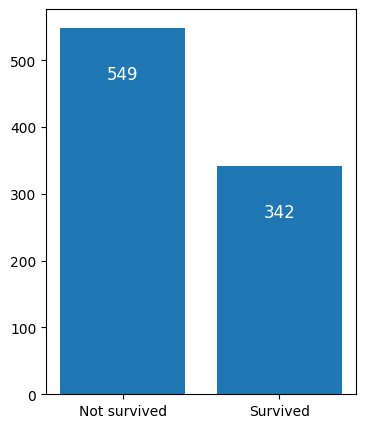

In [83]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)

plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

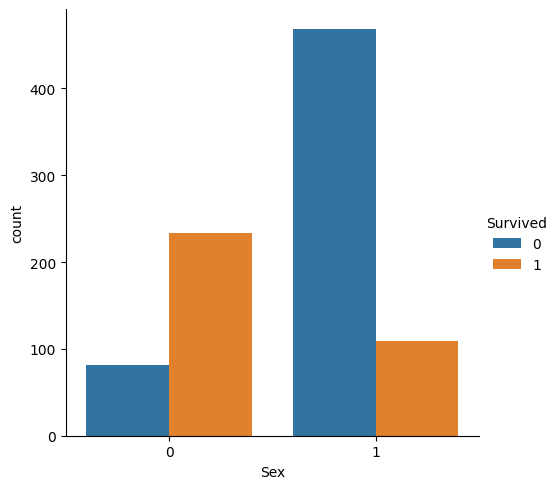

In [70]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = df)

<Axes: xlabel='Fare_Range', ylabel='Survived'>

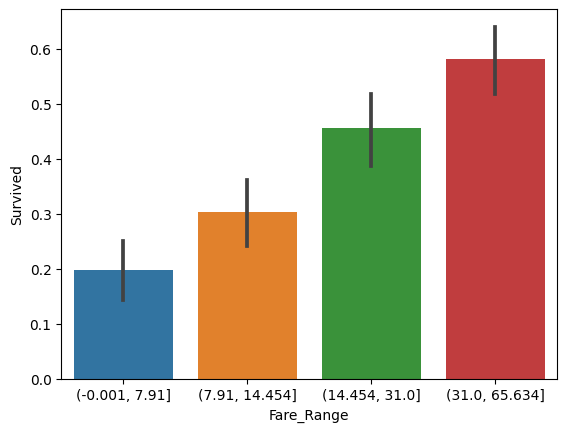

In [71]:

df['Fare_Range'] = pd.qcut(df['Fare'], 4)

sns.barplot(x ='Fare_Range', y ='Survived',data = df)

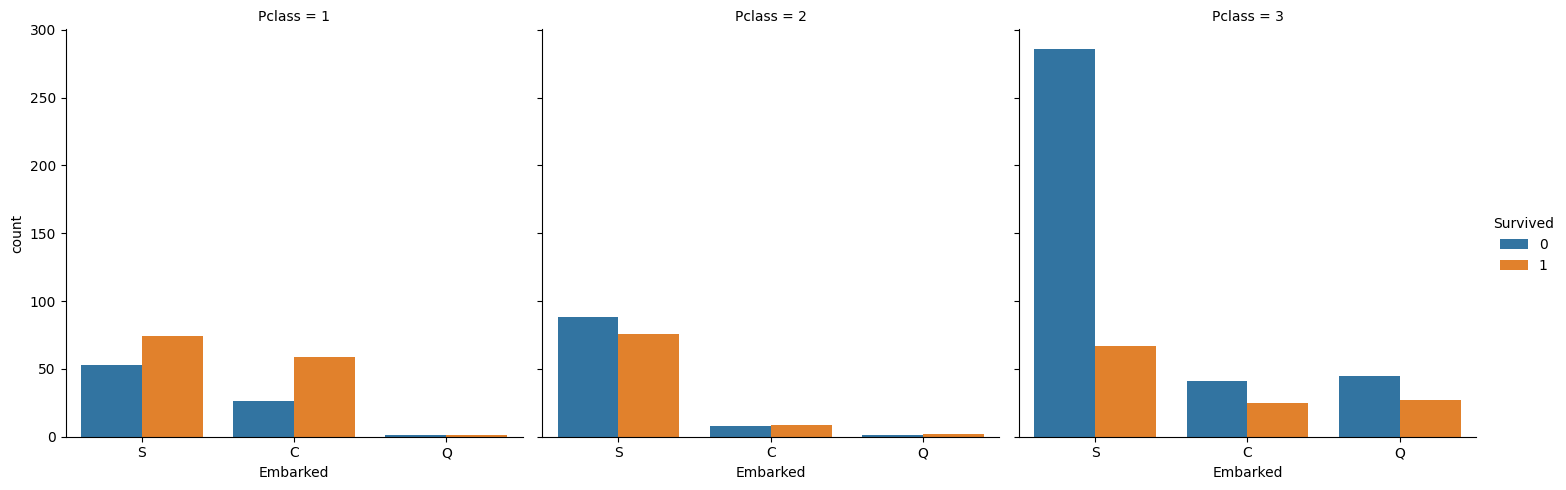

In [72]:
sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = df)

<Axes: xlabel='Embarked', ylabel='Survived'>

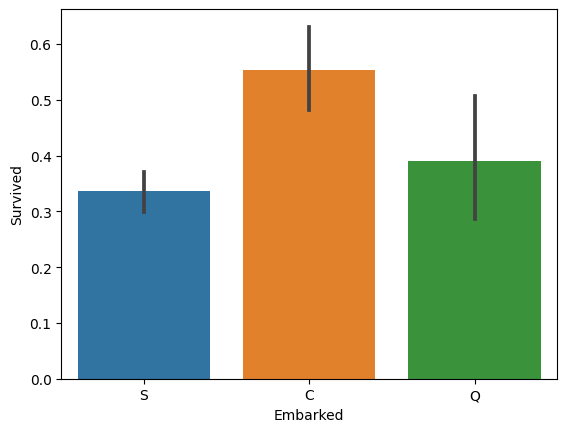

In [73]:
sns.barplot(x="Embarked",y="Survived",data=df)

<Axes: xlabel='Sex', ylabel='Survived'>

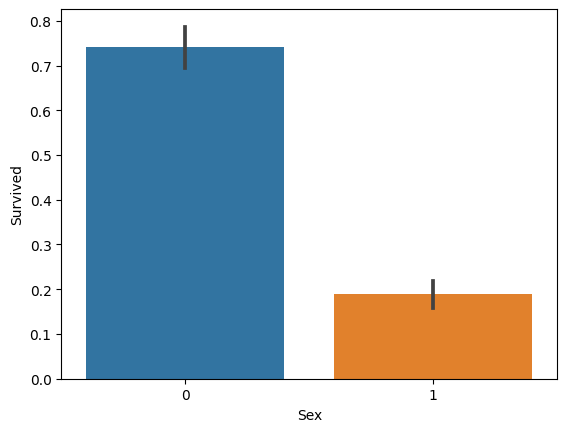

In [74]:
sns.barplot(x="Sex",y="Survived",data=df)

<Axes: xlabel='Age_Range', ylabel='Survived'>

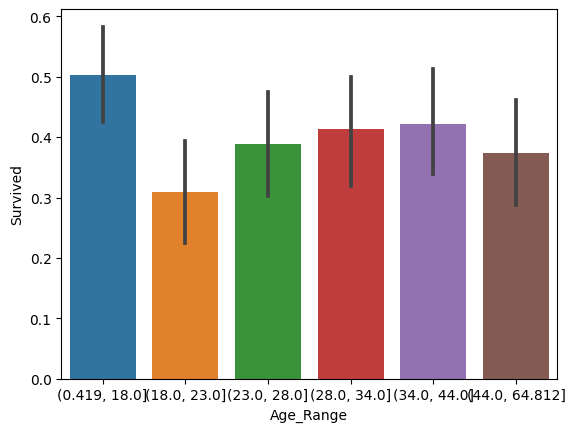

In [78]:

df['Age_Range'] = pd.qcut(df['Age'], 6)

sns.barplot(x ='Age_Range', y ='Survived',data = df)

In [6]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


**SPLITTING DEPENDENT AND INDEPENDENT VARIABLE**

In [7]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [8]:
print(X)

[[1 3 'Braund, Mr. Owen Harris' ... 7.25 nan 'S']
 [2 1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' ... 71.2833
  'C85' 'C']
 [3 3 'Heikkinen, Miss. Laina' ... 7.925 nan 'S']
 ...
 [889 3 'Johnston, Miss. Catherine Helen "Carrie"' ... 23.45 nan 'S']
 [890 1 'Behr, Mr. Karl Howell' ... 30.0 'C148' 'C']
 [891 3 'Dooley, Mr. Patrick' ... 7.75 nan 'Q']]


**CHECKING FOR NULL VALUES**.\
Replacing the missing age data with mean age and missing cabin number and embarked values with most frequent values.


In [9]:
print(dataset.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64


In [10]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,4:5])
X[:,4:5]=imputer.transform(X[:,4:5])

In [11]:
print(X[5:7,0:])

[[6 3 'Moran, Mr. James' 'male' 29.69911764705882 0 0 '330877' 8.4583 nan
  'Q']
 [7 1 'McCarthy, Mr. Timothy J' 'male' 54.0 0 0 '17463' 51.8625 'E46' 'S']]


In [12]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(X[:,9:11])
X[:,9:11]=imputer.transform(X[:,9:11])

In [13]:
print(X[60:65,:])

[[61 3 'Sirayanian, Mr. Orsen' 'male' 22.0 0 0 '2669' 7.2292 'B96 B98'
  'C']
 [62 1 'Icard, Miss. Amelie' 'female' 38.0 0 0 '113572' 80.0 'B28' 'S']
 [63 1 'Harris, Mr. Henry Birkhardt' 'male' 45.0 1 0 '36973' 83.475 'C83'
  'S']
 [64 3 'Skoog, Master. Harald' 'male' 4.0 3 2 '347088' 27.9 'B96 B98' 'S']
 [65 1 'Stewart, Mr. Albert A' 'male' 29.69911764705882 0 0 'PC 17605'
  27.7208 'B96 B98' 'C']]


**Encoding Independent Variable**\
Encoding sex column.

In [14]:
from sklearn.preprocessing import LabelEncoder
dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex'])

In [15]:
dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,1


Male is encoded as 1
Female as 0

**OUTLIER DETECTION**

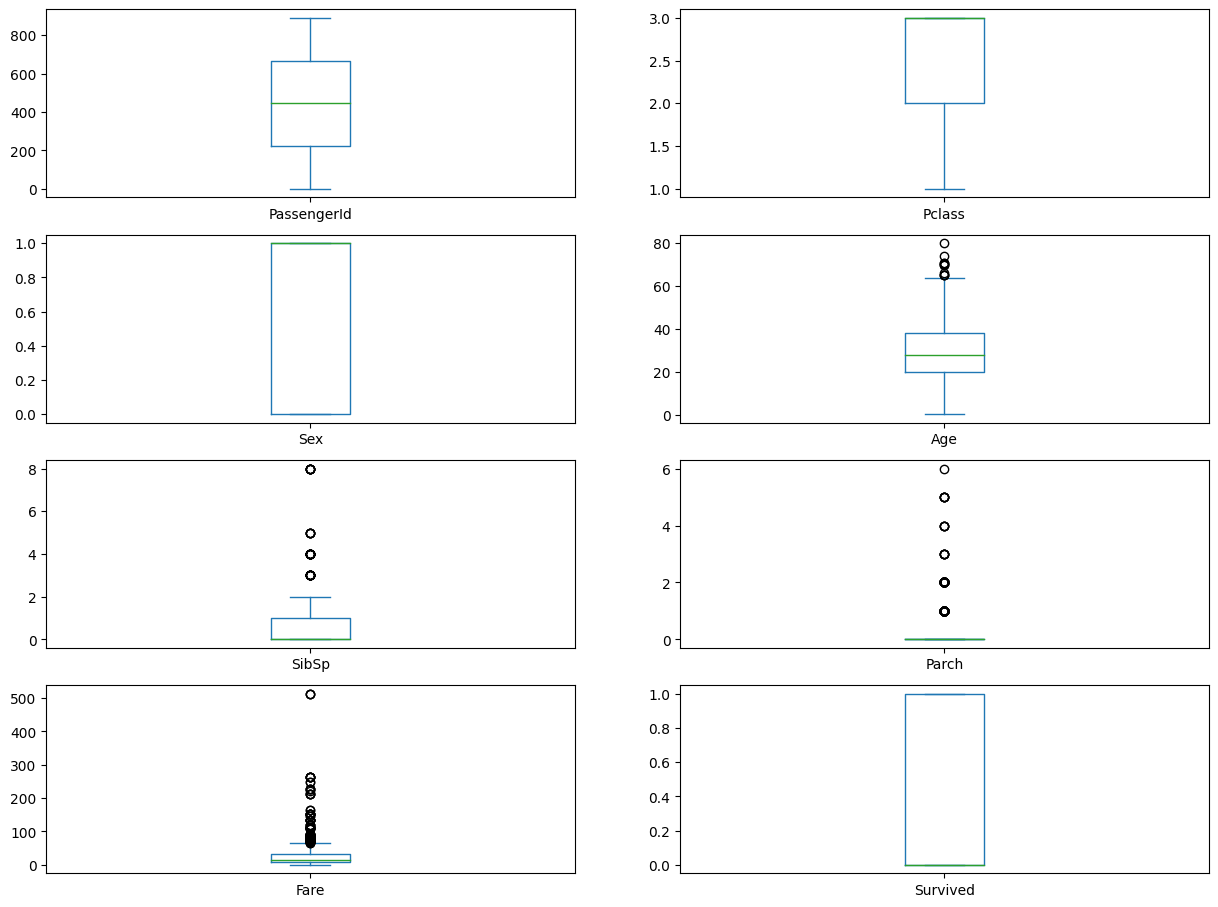

In [16]:

dataset.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

**USING QUARTILE DEVIATION**

In [37]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
age_mean = df['Age'].mean()
age_std = df['Age'].std()
low= age_mean -(3 * age_std)
high= age_mean + (3 * age_std)
age_outliers = df[(df['Age'] < low) | (df['Age'] > high)]
age_outliers.head()

17.875


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
630,631,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.000,A23,S,1
851,852,3,"Svensson, Mr. Johan",1,74.0,0,0,347060,7.775,NaN,S,0


**OUTLIERS OF AGE**

In [38]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

23.0896


In [39]:

whisker_width = 1.5
Fare_outliers = df[(df['Fare'] < Q1 - whisker_width*IQR) | (df['Fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
27,28,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1,0,PC 17569,146.5208,B78,C,1
34,35,1,"Meyer, Mr. Edgar Joseph",1,28.0,1,0,PC 17604,82.1708,NaN,C,0
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.0,1,0,PC 17572,76.7292,D33,C,1


**USING STANDARD DEVIATION**

In [40]:
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df[(df['Fare'] < low) | (df['Fare'] > high)]
fare_outliers.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
27,28,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
88,89,1,"Fortune, Miss. Mabel Helen",0,23.0,3,2,19950,263.0000,C23 C25 C27,S,1
118,119,1,"Baxter, Mr. Quigg Edmond",1,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
258,259,1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,NaN,C,1
299,300,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",0,50.0,0,1,PC 17558,247.5208,B58 B60,C,1


OUTLIERS ARE PRINTED

**REMOVING OUTLIERS OF FARE**

In [41]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Fare']=np.where(df['Fare']>upper_whisker,upper_whisker,np.where(df['Fare']<lower_whisker,lower_whisker,df['Fare']))

<Axes: xlabel='Fare'>

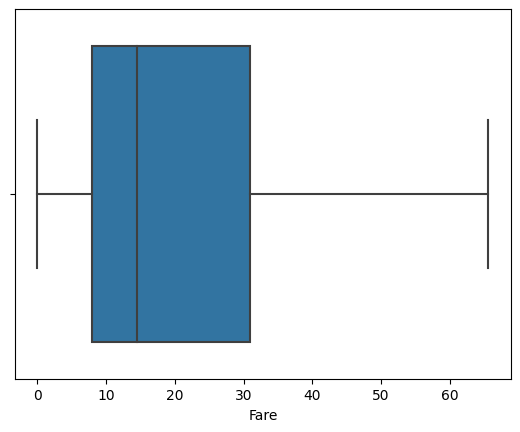

In [44]:
sns.boxplot(x=df["Fare"])

**OUTLIERS ARE REMOVED**

In [45]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

<Axes: xlabel='Age'>

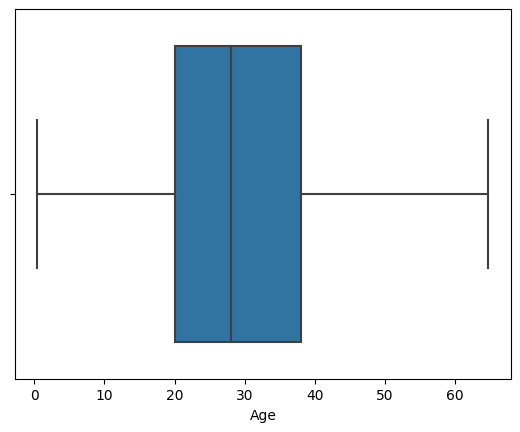

In [46]:
sns.boxplot(x=df["Age"])

**SPLITTING DATA INTO TRAIN AND TEST SET**

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [53]:
print(X_train)

[[302 3 'McCoy, Mr. Bernard' ... 23.25 'B96 B98' 'Q']
 [310 1 'Francatelli, Miss. Laura Mabel' ... 56.9292 'E36' 'C']
 [517 2 'Lemore, Mrs. (Amelia Milley)' ... 10.5 'F33' 'S']
 ...
 [73 2 'Hood, Mr. Ambrose Jr' ... 73.5 'B96 B98' 'S']
 [236 3 'Harknett, Miss. Alice Phoebe' ... 7.55 'B96 B98' 'S']
 [38 3 'Cann, Mr. Ernest Charles' ... 8.05 'B96 B98' 'S']]


In [54]:
print(X_test)

[[863 1 'Swift, Mrs. Frederick Joel (Margaret Welles Barron)' ... 25.9292
  'D17' 'S']
 [224 3 'Nenkoff, Mr. Christo' ... 7.8958 'B96 B98' 'S']
 [85 2 'Ilett, Miss. Bertha' ... 10.5 'B96 B98' 'S']
 ...
 [630 3 "O'Connell, Mr. Patrick D" ... 7.7333 'B96 B98' 'Q']
 [422 3 'Charters, Mr. David' ... 7.7333 'B96 B98' 'Q']
 [449 3 'Baclini, Miss. Marie Catherine' ... 19.2583 'B96 B98' 'C']]


In [55]:
print(y_train)

[1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 1 0 1 

In [56]:
print(y_test)

[1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1]


**FEATURE SCALING**

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,4:9]=sc.fit_transform(X_train[:,4:9])
X_test[:,4:9]=sc.fit_transform(X_test[:,4:9])

In [61]:
print(X_train)

[[-0.028104986699835386 -0.028104986699835386 -0.028104986699835386 ...
  -0.02810498669983558 -0.028104986699835386 -0.028104986699835386]
 [-0.005412181761448325 -0.005412181761448325 -0.005412181761448325 ...
  -0.0054121817614485096 -0.005412181761448325 -0.005412181761448325]
 [0.29627124654946124 0.29627124654946124 0.29627124654946124 ...
  0.2962712465494612 0.29627124654946124 0.29627124654946124]
 ...
 [-0.6841998954609948 -0.6841998954609948 -0.6841998954609948 ...
  -0.6841998954609952 -0.6841998954609948 -0.6841998954609948]
 [-0.028104986699835386 -0.028104986699835386 -0.028104986699835386 ...
  -0.02810498669983558 -0.028104986699835386 -0.028104986699835386]
 [-0.6841998954609948 -0.6841998954609948 -0.6841998954609948 ...
  -0.6841998954609952 -0.6841998954609948 -0.6841998954609948]]


In [62]:
print(X_test)

[[1.6808760740211355 1.6808760740211355 1.6808760740211355 ...
  1.680876074021135 1.6808760740211355 1.6808760740211355]
 [0.1259388476674624 0.1259388476674624 0.1259388476674624 ...
  0.12593884766746194 0.1259388476674624 0.1259388476674624]
 [-0.9530435964813654 -0.9530435964813654 -0.9530435964813654 ...
  -0.9530435964813658 -0.9530435964813654 -0.9530435964813654]
 ...
 [0.1259388476674624 0.1259388476674624 0.1259388476674624 ...
  0.12593884766746194 0.1259388476674624 0.1259388476674624]
 [-0.6131829938358814 -0.6131829938358814 -0.6131829938358814 ...
  -0.6131829938358818 -0.6131829938358814 -0.6131829938358814]
 [-1.9726254044178173 -1.9726254044178173 -1.9726254044178173 ...
  -1.9726254044178178 -1.9726254044178173 -1.9726254044178173]]
